In [6]:
import csv
import pandas as pd
a = []
d=pd.read_csv("C:/Users/asus/Downloads/enjoysport.csv")
print(d)
with open('C:/Users/asus/Downloads/enjoysport.csv', 'r') as csvfile:
	for row in csv.reader(csvfile):
		a.append(row)
print("\n The total number of training instances are : ",len(a))
num_attribute = len(a[0])-1
print("\n The initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)
for i in range(0, len(a)):
	if a[i][num_attribute] == 'yes':
		for j in range(0, num_attribute):
			if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
				hypothesis[j] = a[i][j]
			else:
 				hypothesis[j] = '?'
	print("\n The hypothesis for the training instance {} is :\n" .format(i+1),hypothesis)
print("\n The Maximally specific hypothesis for the training instance is ")
print(hypothesis)

     sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes

 The total number of training instances are :  5

 The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 1 is :
 ['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 2 is :
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The hypothesis for the training instance 3 is :
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 4 is :
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 5 is :
 ['sunny', 'warm', '?', 'strong', '?', '?']

 The Maximally specific hypothesis for the training instance is 
['sunny', 'warm', '?', 'strong', '?', '?']


In [7]:

import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'
                print(specific_h)
        print(specific_h)
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print(" steps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")


[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 steps of Candidate Elimination Algorithm 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load the dataset
data = pd.read_csv('C:/Users/asus/Downloads/student.csv')
# printing original dataset
print(data)
# Data cleaning
data = data.dropna()  # Remove rows with missing values
# Remove duplicate names
data = data.drop_duplicates(subset='Name')
# print the dataset after cleaning
print("\n",data)
# Data transformation ie, Scale numerical features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Age', 'GPA']])  
data[['Age', 'GPA']] = scaled_data
# Data integration 
# Combining columns 'Name' and 'Grade' into a new column 'Student_Info'
data['Student_Info'] = data['Name'] + ' (' + data['Grade'] + ')'
# Print the preprocessed data
print("\n",data.head())

        Name   Age  Gender Grade  GPA
0      Ethan  20.0    male     A  8.0
1       Liam  21.0    male     A  8.1
2       Liam  20.0    male     B  6.0
3      Grace  21.0  female     A  9.0
4     Wilson  20.0    male     A  9.1
5      Emily   NaN  female     A  8.3
6   Mitchell  22.0    male   NaN  7.7
7   Benjamin  20.0    male     B  NaN
8     Olivia   NaN  female     A  8.0
9     Sophia  18.0  female     A  8.1
10   Jackson  19.0    male     B  7.5
11    Wilson  21.0    male     A  8.9
12     Lucas   NaN    male     B  7.0
13       Ava  21.0  female     A  8.4

        Name   Age  Gender Grade  GPA
0     Ethan  20.0    male     A  8.0
1      Liam  21.0    male     A  8.1
3     Grace  21.0  female     A  9.0
4    Wilson  20.0    male     A  9.1
9    Sophia  18.0  female     A  8.1
10  Jackson  19.0    male     B  7.5
13      Ava  21.0  female     A  8.4

      Name       Age  Gender Grade     GPA Student_Info
0   Ethan  0.666667    male     A  0.3125    Ethan (A)
1    Liam  1.000000 

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# reading the dataset
dataset = pd.read_csv('C:/Users/asus/Downloads/PlayTennis.csv')
features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
X = dataset[features]
Y = dataset.PlayTennis
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X), columns=encoder.get_feature_names_out(features))
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.30, random_state=100)
# building the decision tree
dtree = DecisionTreeClassifier(criterion="entropy", random_state=100)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
# classifying the new instance based on the training data
def classify_new_instance(outlook, temperature, humidity, wind, encoder):
    instance = [[outlook, temperature, humidity, wind]]
    instance_df = pd.DataFrame(instance, columns=features)
    instance_encoded = encoder.transform(instance_df)
    feature_names = encoder.get_feature_names_out(features)
    instance_encoded_df = pd.DataFrame(instance_encoded, columns=feature_names)
    prediction = dtree.predict(instance_encoded_df)
    return prediction[0]
# predicting the class of new instance
pred = classify_new_instance("Rain","Mild","High","Strong", encoder=encoder)
print("Prediction:", pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Prediction: No
Accuracy: 0.6


C:\Users\asus\AppData\Local\Temp\ipykernel_32200\1704147963.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


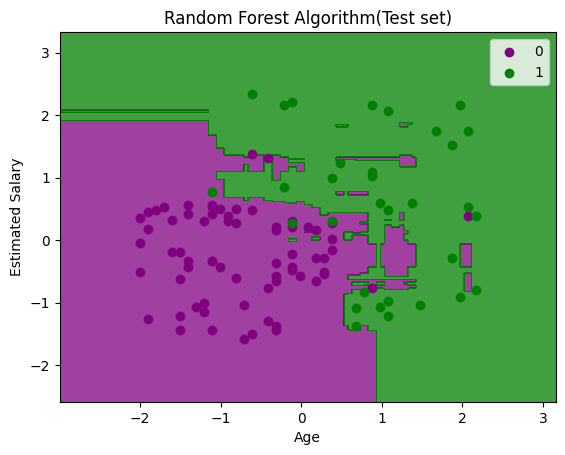

In [4]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap 
#importing datasets  
data_set= pd.read_csv('C:/Users/asus/Downloads/User_data.csv')  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling   
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    
#Fitting Decision tree classifier to the training set    
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
#Creating the Confusion matrix    
cm= confusion_matrix(y_test, y_pred)
#Visulaizing the test set result   
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, 
step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.
shape),  alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j) 

# plotting the random forest
plt.title('Random Forest Algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
df = pd.read_csv("C:/Users/asus/Downloads/pima_indian.csv")
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 
'diab_pred', 'age']
predicted_class_names = ['diabetes']
X = df[feature_col_names].values  # these are factors for the prediction
y = df[predicted_class_names].values  # this is what we want to predict
#splitting the dataset into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)
print ('\n the total number of Training Data:',ytrain.shape)
print ('\n the total number of Test Data:',ytest.shape)
# Training Naive Bayes (NB) classifier on training data.
clf = GaussianNB().fit(xtrain,ytrain.ravel())
predicted = clf.predict(xtest)
predictTestData= clf.predict([[6,148,72,35,0,33.6,0.627,50]])
#printing Confusion matrix, accuracy, Precision and Recall
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\n Accuracy of the classifier is',metrics.accuracy_score
(ytest,predicted))
print('\n The value of Precision', metrics.precision_score
(ytest,predicted))
print('\n The value of Recall', metrics.recall_score
(ytest,predicted))
print("Predicted Value for individual Test Data:", predictTestData)



 the total number of Training Data: (514, 1)

 the total number of Test Data: (254, 1)

 Confusion matrix
[[145  28]
 [ 33  48]]

 Accuracy of the classifier is 0.7598425196850394

 The value of Precision 0.631578947368421

 The value of Recall 0.5925925925925926
Predicted Value for individual Test Data: [1]


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
msg=pd.read_csv("C:/Users/asus/Downloads/naivetext.csv",names=['message','label'])
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum

#splitting the dataset into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

#output of the words or Tokens in the text documents
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)
print('\n The words or Tokens in the text documents \n')

# if get_feature_names_out() gives error then replace it with get_feature_names()
print(count_vect.get_feature_names_out())
df=pd.DataFrame(xtrain_dtm.toarray(),
columns=count_vect.get_feature_names_out())

# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

#printing accuracy, Confusion matrix, Precision and Recall
print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\n The value of Precision', metrics.precision_score(ytest,predicted))
print('\n The value of Recall', metrics.recall_score(ytest,predicted))



 The words or Tokens in the text documents 

['about' 'am' 'amazing' 'an' 'awesome' 'beers' 'best' 'can' 'deal' 'do'
 'enemy' 'feel' 'fun' 'good' 'great' 'have' 'he' 'holiday' 'house' 'is'
 'juice' 'like' 'love' 'my' 'not' 'of' 'place' 'restaurant' 'sandwich'
 'stuff' 'sworn' 'taste' 'the' 'these' 'this' 'tired' 'to' 'today'
 'tomorrow' 'very' 'view' 'we' 'went' 'what' 'will' 'with' 'work']

 Accuracy of the classifier is 0.8

 Confusion matrix
[[2 1]
 [0 2]]

 The value of Precision 0.6666666666666666

 The value of Recall 1.0


In [9]:
import numpy as np
import pandas as pd
import csv 
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
heartDisease = pd.read_csv('C:/Users/asus/Downloads/heart.csv')
heartDisease = heartDisease.replace('?',np.nan)
print('Sample instances from the dataset are given below')
print(heartDisease.head())
print('\n Attributes and datatypes')
print(heartDisease.dtypes)
model= BayesianModel([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)
print('\n 1. Probability of HeartDisease given evidence= restecg')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)
print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)


Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca              

C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\AppData\Local\Temp\ipykernel_32200\1498716495.py:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


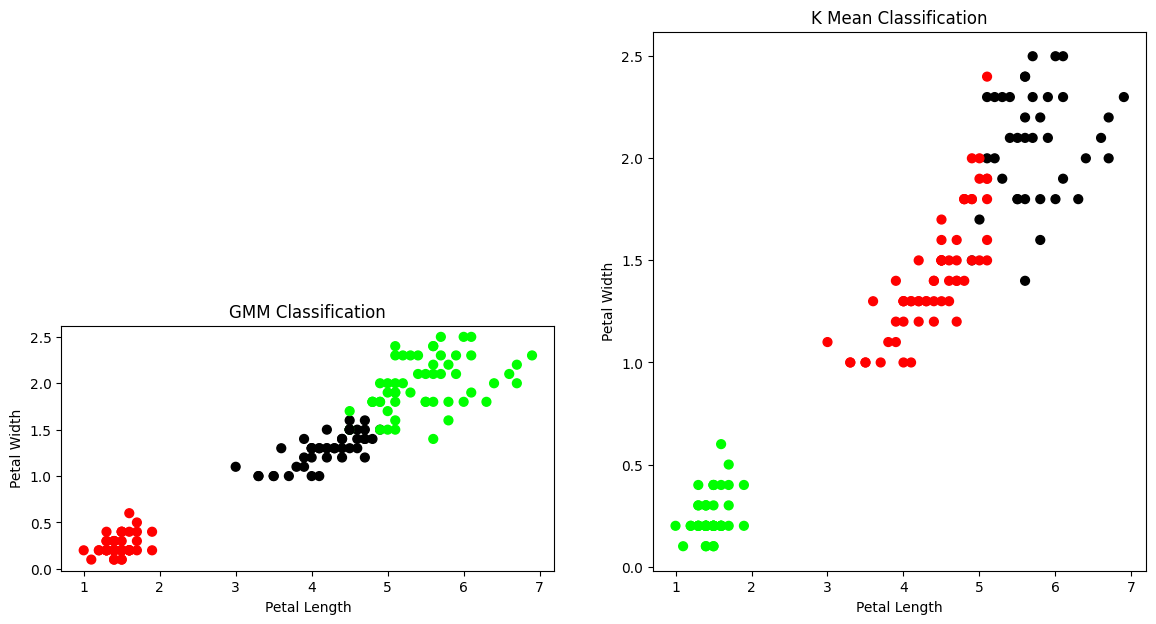

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))


Accuracy: 1.0


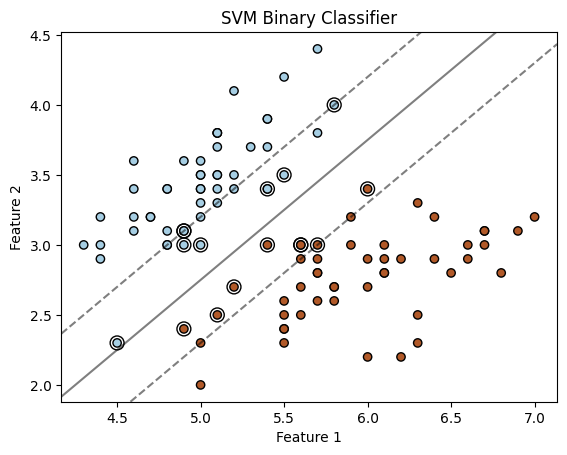

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Load the dataset (example: Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]   # Consider only the first two features for simplicity
y = iris.target
# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=42)
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Plot the decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Create a meshgrid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)
# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], 
  s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Binary Classifier')
plt.show()
